In [2]:
import csv

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas.api.types import CategoricalDtype
import numpy as np 
import pickle


import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('output.csv')


In [5]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,NaN,0.3,38.40,1.0,1.0,2.75
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,NaN,0.3,48.80,2.0,1.0,0.00
2,2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,NaN,0.3,70.30,1.0,2.0,0.00
3,2,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
4,2,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,NaN,0.3,23.80,1.0,1.0,0.00


In [6]:
df.shape

(76891, 20)

In [7]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,76891.000000,66433.000000,76891.000000,76891.000000,66433.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,76891.000000,0.0,76891.000000,76891.000000,66433.000000,66430.000000,66433.000000
mean,1.860543,1.218235,100.478079,138.448830,1.279635,118.614916,15.537695,0.336499,0.407929,2.126048,0.283878,NaN,0.297402,19.664402,1.369184,1.045702,0.739211
std,0.346425,1.104788,64.494962,76.519444,0.903108,3899.610103,13.537154,0.643090,0.196376,3.431635,1.477606,NaN,0.034079,15.803459,0.498030,0.208840,1.219352
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-60.000000,-4.500000,-0.500000,-2.080000,0.000000,NaN,-0.300000,-60.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.190000,8.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.110000,11.500000,0.000000,0.500000,1.550000,0.000000,NaN,0.300000,15.300000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,134.000000,217.000000,1.000000,3.950000,18.920000,0.500000,0.500000,3.030000,0.000000,NaN,0.300000,23.730000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,595.500000,4.500000,0.500000,333.330000,57.700000,NaN,0.300000,596.300000,4.000000,2.000000,2.750000


In [8]:
df.dtypes


VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [9]:
number_of_records = len(df)
print("Number of records in the DataFrame:", number_of_records)

Number of records in the DataFrame: 76891


In [10]:
len(df[df['total_amount'] <= 0])


317

In [11]:
df = df[df['total_amount'] > 0]


In [12]:
number_of_records = len(df)
print("Number of records in the DataFrame:", number_of_records)

Number of records in the DataFrame: 76574


In [13]:
len(df[df['fare_amount'] <= 0])


18

In [14]:
len(df[df['trip_distance'] <= 0])

4336

In [15]:
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] >= 0)]


In [16]:
len(df)

76556

In [17]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,NaN,0.3,38.40,1.0,1.0,2.75
1,2,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,NaN,0.3,48.80,2.0,1.0,0.00
2,2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,NaN,0.3,70.30,1.0,2.0,0.00
3,2,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
4,2,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,NaN,0.3,23.80,1.0,1.0,0.00


In [18]:
df['store_and_fwd_flag'].value_counts()


store_and_fwd_flag
N    65544
Y      563
Name: count, dtype: int64

In [19]:
df['store_and_fwd_flag'].fillna('N', inplace= True)


In [20]:
df['store_and_fwd_flag'].value_counts()


store_and_fwd_flag
N    75993
Y      563
Name: count, dtype: int64

In [21]:
df['payment_type'].value_counts(normalize= True)


payment_type
1.0    0.639191
2.0    0.358132
3.0    0.002042
4.0    0.000635
Name: proportion, dtype: float64

In [22]:
df.groupby('payment_type')['total_amount'].quantile(0.95)


payment_type
1.0    46.550
2.0    38.800
3.0    53.460
4.0    32.175
Name: total_amount, dtype: float64

In [23]:
df.loc[(df['payment_type'].isna()) & (df['total_amount'] > 50), 'payment_type'] = 1.0
df.loc[(df['payment_type'].isna()) & (df['total_amount'] <= 50), 'payment_type'] = 2.0

In [24]:
df['RatecodeID'].value_counts()


RatecodeID
1.0     62345
5.0      3315
2.0       331
4.0        65
3.0        47
99.0        3
6.0         1
Name: count, dtype: int64

In [25]:
df.groupby('RatecodeID')['total_amount'].quantile(0.95)


RatecodeID
1.0      38.82
2.0      82.13
3.0     124.82
4.0     230.10
5.0      90.36
6.0       3.30
99.0     28.67
Name: total_amount, dtype: float64

In [26]:
df.loc[(df['RatecodeID'].isna()) & (df['total_amount'] >= 184), 'RatecodeID'] = 4.0
df.loc[(df['RatecodeID'].isna()) & (138 <= df['total_amount']) & (df['total_amount']< 184), 'RatecodeID'] = 3.0
df.loc[(df['RatecodeID'].isna()) & (79 <= df['total_amount']) & (df['total_amount']< 138), 'RatecodeID'] = 2.0
df.loc[(df['RatecodeID'].isna()) & (0 <= df['total_amount']) & (df['total_amount']< 79), 'RatecodeID'] = 1.0

In [27]:
df['passenger_count'].value_counts(normalize= True)


passenger_count
1.0    0.853525
2.0    0.087479
5.0    0.019937
6.0    0.014779
3.0    0.014204
0.0    0.005325
4.0    0.004402
8.0    0.000197
7.0    0.000091
9.0    0.000061
Name: proportion, dtype: float64

In [28]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==7, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==32, 'passenger_count'] = 1.0

In [29]:
df.loc[df['passenger_count'].isna(), 'passenger_count'] = 1.0


In [30]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                76556
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                10452
congestion_surcharge     10449
dtype: int64

In [31]:
df = df.drop(['ehail_fee', 'VendorID', 'trip_type', 'congestion_surcharge'], axis= 1)


In [32]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type'],
      dtype='object')

In [33]:
df.describe()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
count,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000,76556.000000
mean,1.187902,100.400099,138.493025,1.245755,119.127698,15.617487,0.338488,0.410720,2.131468,0.284418,0.299318,19.759777,1.436831
std,1.025430,64.438319,76.496716,0.839402,3908.125283,13.504647,0.643338,0.191484,3.409388,1.478424,0.014286,15.757380,0.502823
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000
25%,1.000000,65.000000,74.000000,1.000000,1.200000,8.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,1.000000
50%,1.000000,75.000000,138.000000,1.000000,2.120000,11.500000,0.000000,0.500000,1.560000,0.000000,0.300000,15.360000,1.000000
75%,1.000000,134.000000,217.000000,1.000000,3.960000,19.000000,0.500000,0.500000,3.060000,0.000000,0.300000,23.790000,2.000000
max,99.000000,265.000000,265.000000,9.000000,360068.140000,595.500000,4.500000,0.500000,333.330000,57.700000,0.300000,596.300000,4.000000


In [34]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,0.3,38.40,1.0
1,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,0.3,48.80,2.0
2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,0.3,70.30,1.0
3,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0
4,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,0.3,23.80,1.0


In [35]:
len(df)

76556

In [36]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
dtype: int64

In [37]:
df.shape


(76556, 16)

In [38]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])


In [39]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])


In [40]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type
0,2022-05-01 00:01:28,2022-05-01 00:27:47,N,1.0,181,107,1.0,8.10,25.5,3.25,0.5,8.85,0.0,0.3,38.40,1.0
1,2022-05-01 00:54:45,2022-05-01 01:22:01,N,1.0,119,168,2.0,16.99,47.5,0.50,0.5,0.00,0.0,0.3,48.80,2.0
2,2022-05-01 00:11:22,2022-05-01 00:11:56,N,5.0,255,255,3.0,0.16,60.0,0.00,0.0,10.00,0.0,0.3,70.30,1.0
3,2022-05-01 00:21:09,2022-05-01 00:48:41,N,1.0,223,50,1.0,5.66,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0
4,2022-04-30 23:21:10,2022-04-30 23:38:37,N,1.0,75,153,1.0,7.52,22.5,0.50,0.5,0.00,0.0,0.3,23.80,1.0


In [41]:
df.dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
dtype: object

In [55]:
df['store_and_fwd_flag'] = pd.to_numeric(df['store_and_fwd_flag'], errors='coerce')  # Convert 'numeric_column' to numeric, converting 'N' to NaN


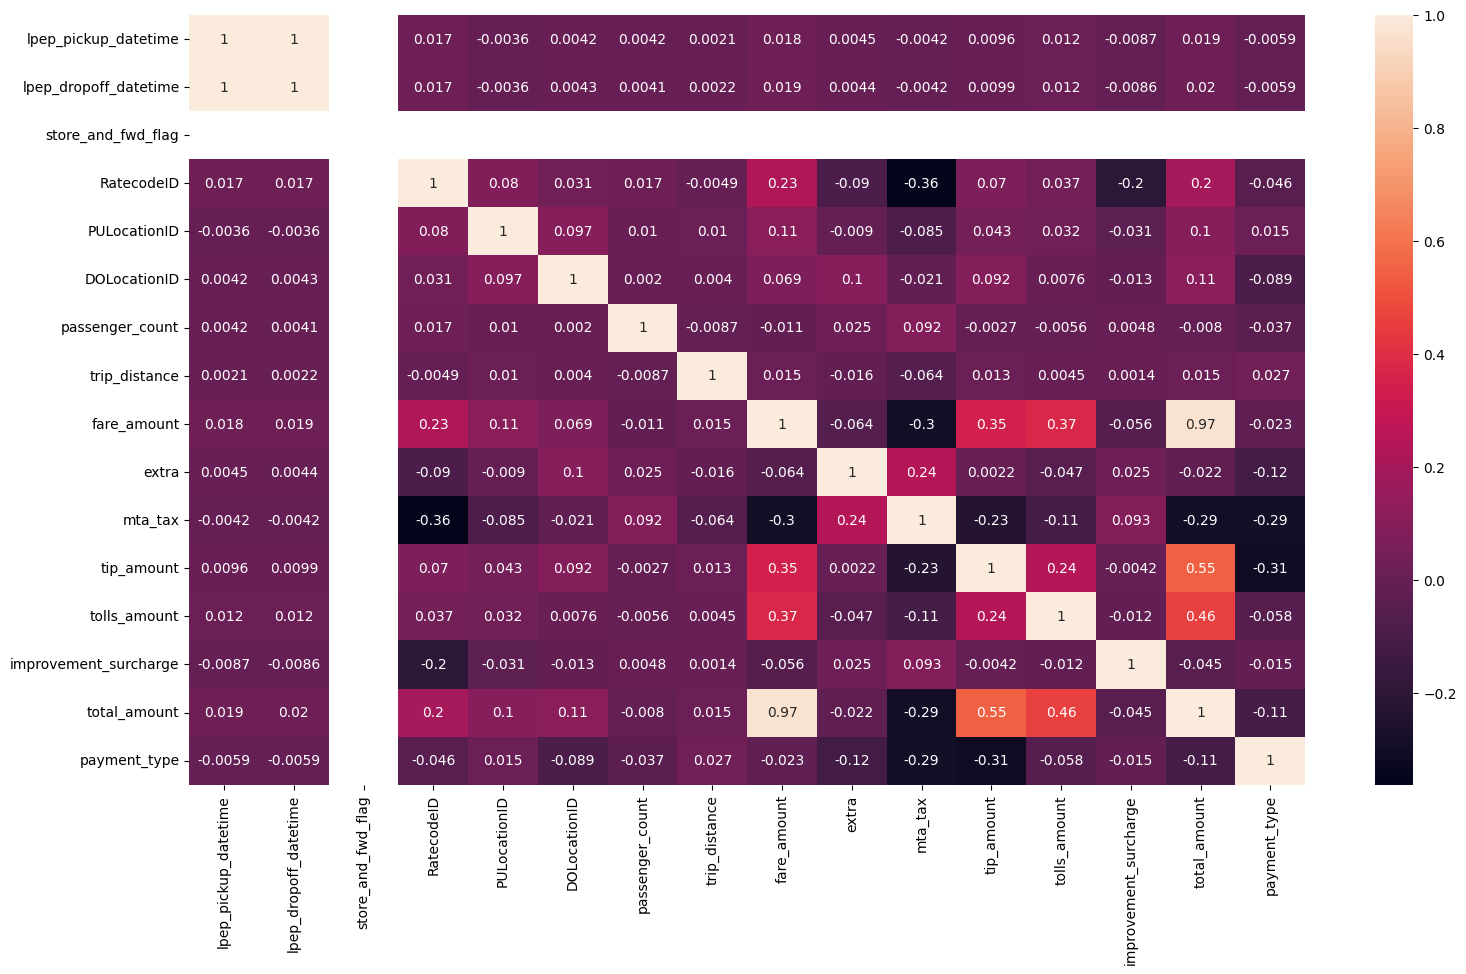

In [43]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);

In [44]:
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()


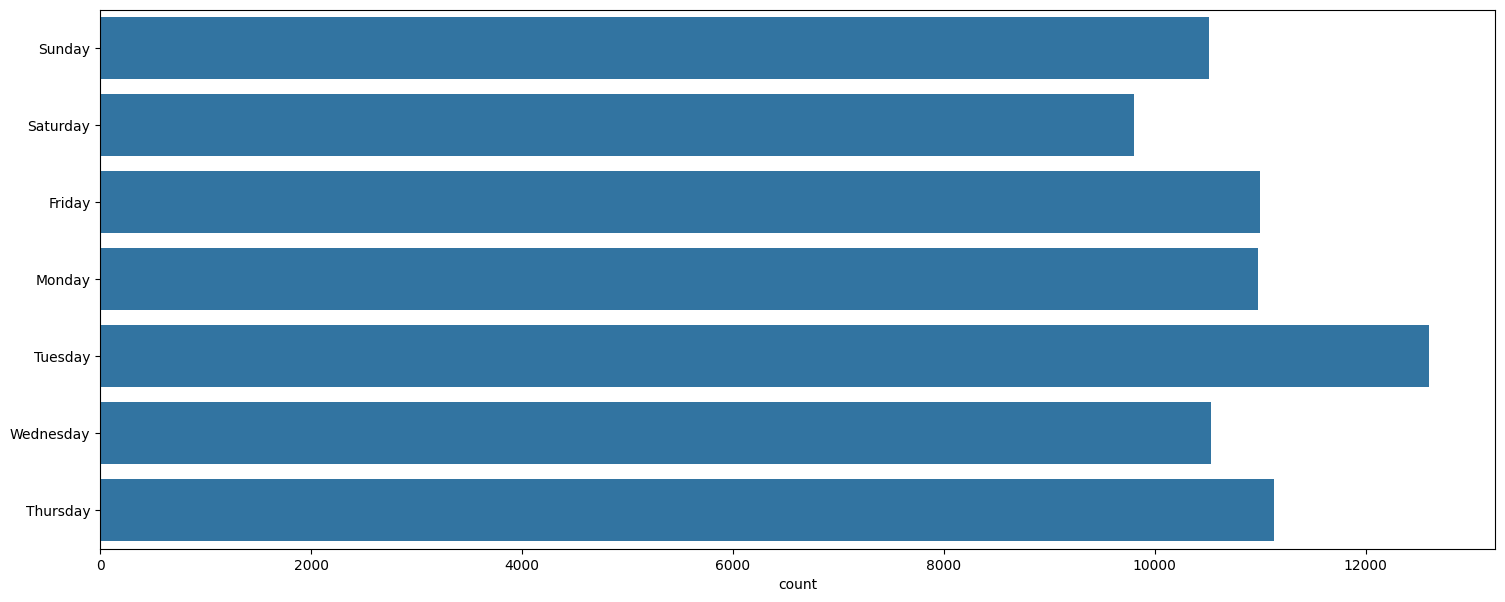

In [45]:
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= df)
plt.ylabel('');

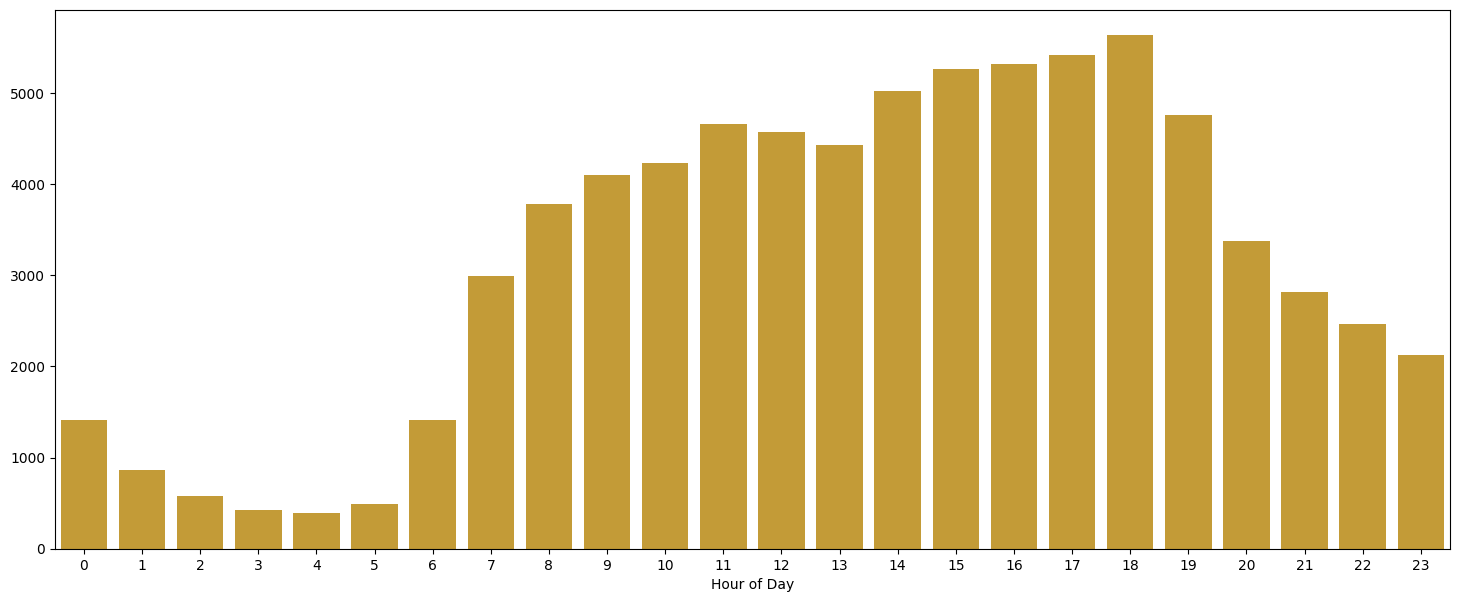

In [48]:
plt.figure(figsize= (18, 7))
sns.countplot(x= df['lpep_pickup_datetime'].dt.hour, data= df, color= 'goldenrod')
plt.ylabel('')
plt.xlabel('Hour of Day');

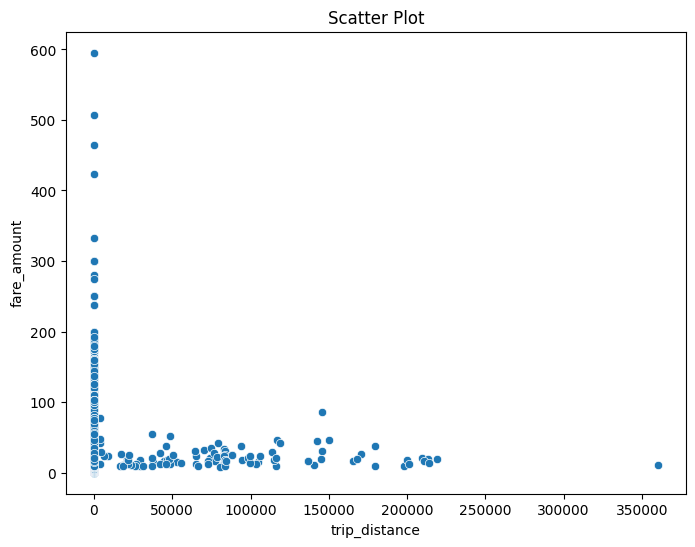

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Scatter Plot')
plt.savefig('scatter_plot.png')  # Save the visualization as a PNG file
#plt.close()


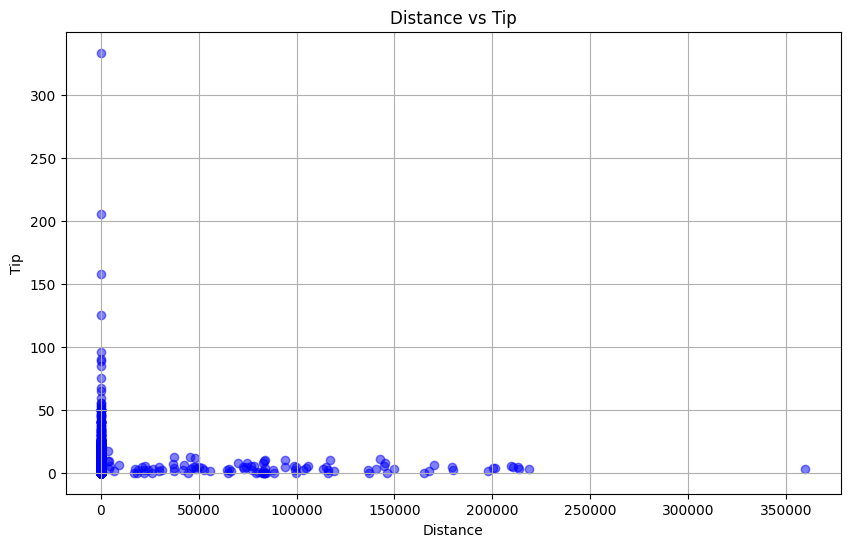

In [62]:
distance = df['trip_distance']
tip = df['tip_amount']
plt.figure(figsize=(10, 6))
plt.scatter(distance, tip, color='blue', alpha=0.5)  # Scatter plot for distance vs tip
plt.title('Distance vs Tip')
plt.xlabel('Distance')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

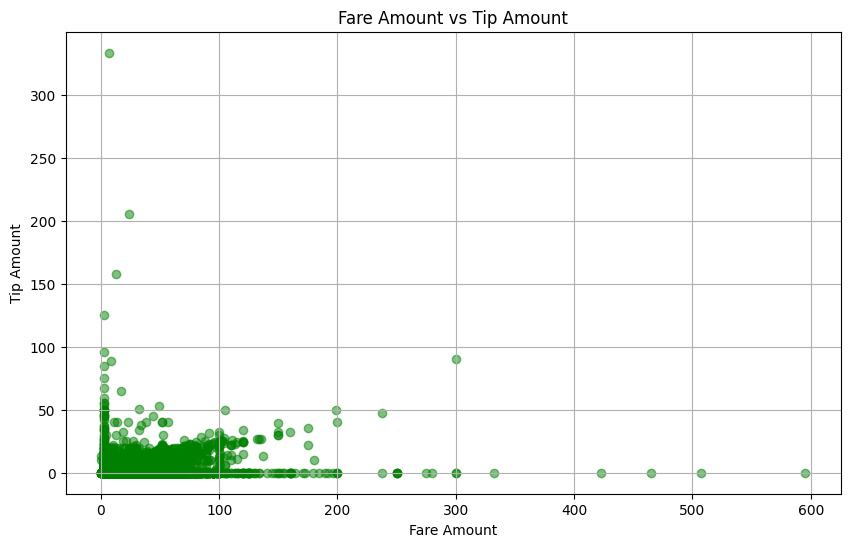

In [69]:
fare_amount = df['fare_amount']
tip = df['tip_amount']

# Plotting the relationship between fare amount and tip amount
plt.figure(figsize=(10, 6))
plt.scatter(fare_amount, tip, color='green', alpha=0.5)  # Scatter plot for fare amount vs tip amount
plt.title('Fare Amount vs Tip Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['trip_distance'][:1000])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Histogram')
plt.savefig('histogram.png')  # Save the visualization as a PNG file
plt.close()

Text(0.5, 0.92, '3D Scatter Plot: Tip Amount, Fare Amount, and Distance')

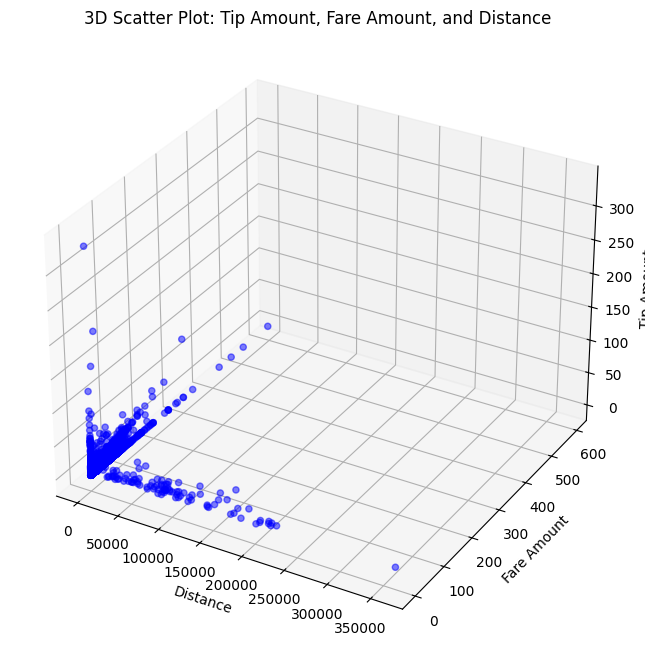

In [68]:
tip = df['tip_amount']
fare_amount = df['fare_amount']
distance = df['trip_distance']

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(distance, fare_amount, tip, c='blue', marker='o', alpha=0.5)

# Labeling the axes
ax.set_xlabel('Distance')
ax.set_ylabel('Fare Amount')
ax.set_zlabel('Tip Amount')


# Adding title
plt.title('3D Scatter Plot: Tip Amount, Fare Amount, and Distance')

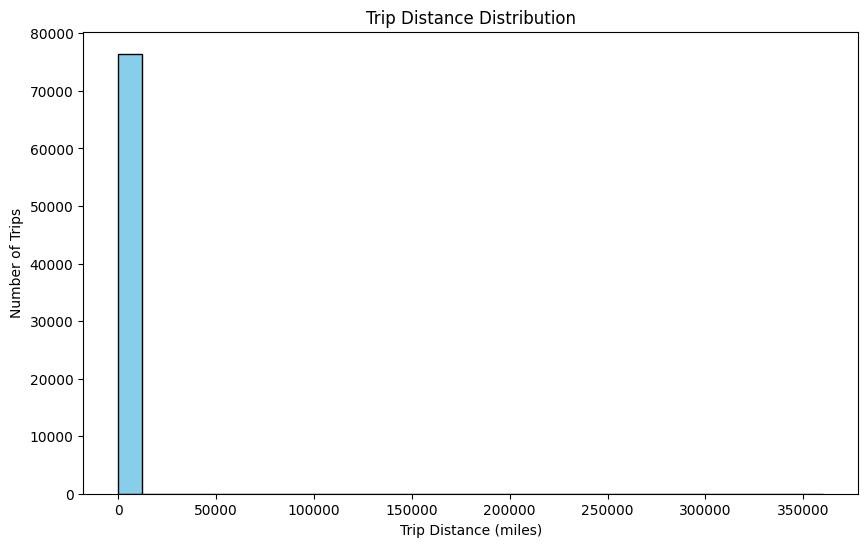

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df['trip_distance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.show()

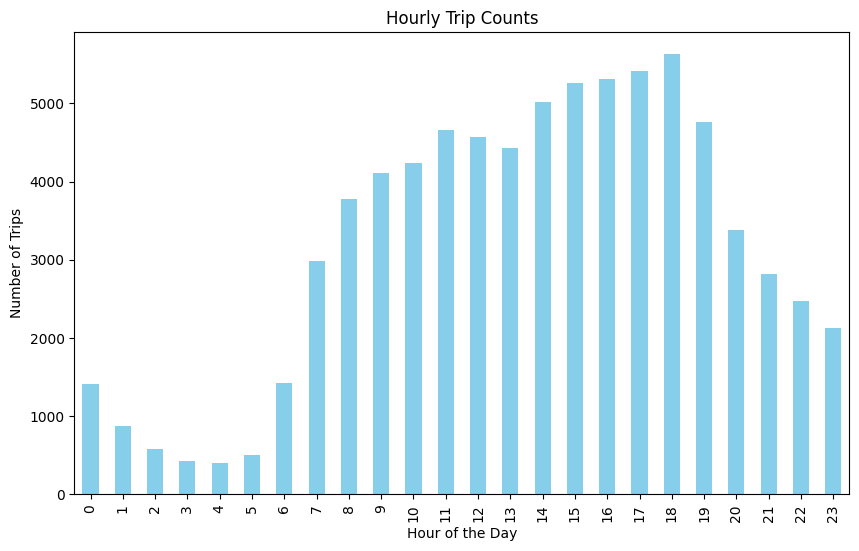

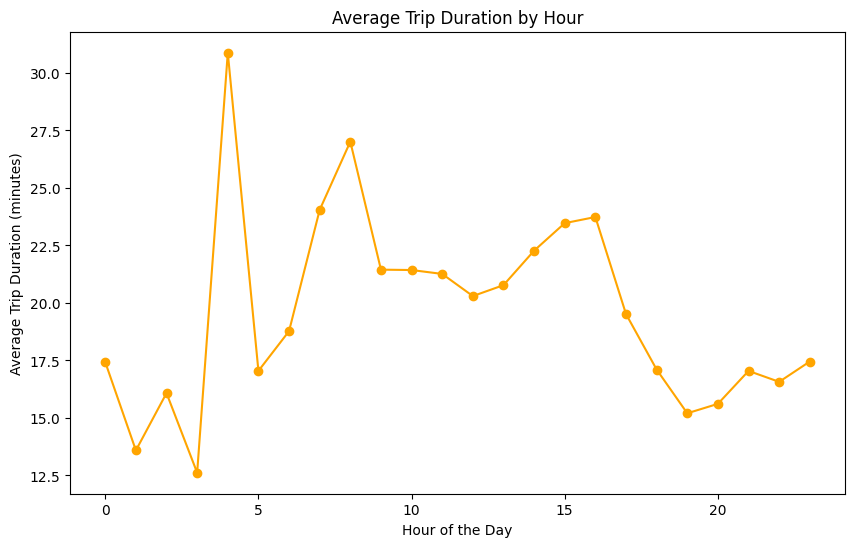

In [81]:
# Convert datetime columns to datetime objects
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Calculate trip durations
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Time analysis
hourly_counts = df['lpep_pickup_datetime'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Trip Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Average trip duration by hour
avg_duration_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_hour.plot(kind='line', marker='o', color='orange')
plt.title('Average Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()


In [53]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Report Title', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page %s' % self.page_no(), 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)

pdf.cell(0, 10, 'Histogram Example', 0, 1)
pdf.image('histogram.png', x = None, y = None, w = 0, h = 150)
pdf.ln(10)

pdf.cell(0, 10, 'Scatter Plot Example', 0, 1)
pdf.image('scatter_plot.png', x = None, y = None, w = 0, h = 150)
pdf.output('report.pdf')


''

In [73]:
df.to_csv('updated_transformed_data.csv', index=False)


In [76]:
df.to_excel('output_excel.xlsx', index=True)  # Output will be saved as 'output.xlsx'
